<a href="https://colab.research.google.com/github/Asma-Ahmed-Aqil-AL-Zubaidi/week_6/blob/main/Another_copy_of_Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 62.6MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [196]:
df=pd.read_csv("/content/Traffic Data.csv")

In [197]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1JZPCgOPvz0yqXDjjkFTZbcivKQ6T3dxbgzX55VHwiOs#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


'rain_1h', 'snow_1h' i well drop this tow column ,

In [198]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time'],
      dtype='object')

In [199]:
df = df.drop('rain_1h', axis=1)

In [200]:
df = df.drop('snow_1h', axis=1)

In [201]:
df["date_time"] = pd.to_datetime(df["date_time"])

In [202]:
#df.set_index("date_time", inplace=True)

In [203]:
df.head()

,traffic_volume,temp,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,5,Clear,sky is clear,2017-11-09 15:00:00


In [204]:
df.describe(include="all")

,traffic_volume,temp,clouds_all,weather_main,weather_description,date_time
count,19980.000000,20000.000000,20000.000000,20000,20000,20000
unique,NaN,NaN,NaN,10,34,NaN
top,NaN,NaN,NaN,Clear,sky is clear,NaN
freq,NaN,NaN,NaN,5614,5514,NaN
mean,3278.186887,281.162680,49.384600,NaN,NaN,2017-10-22 04:13:17.939999744
min,113.000000,243.390000,0.000000,NaN,NaN,2016-11-18 15:00:00
25%,1228.750000,271.950000,1.000000,NaN,NaN,2017-04-30 14:45:00
50%,3430.000000,281.825000,75.000000,NaN,NaN,2017-10-21 07:30:00
75%,4928.000000,291.840000,90.000000,NaN,NaN,2018-04-13 21:00:00
max,16781.000000,310.070000,92.000000,NaN,NaN,2018-09-30 23:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

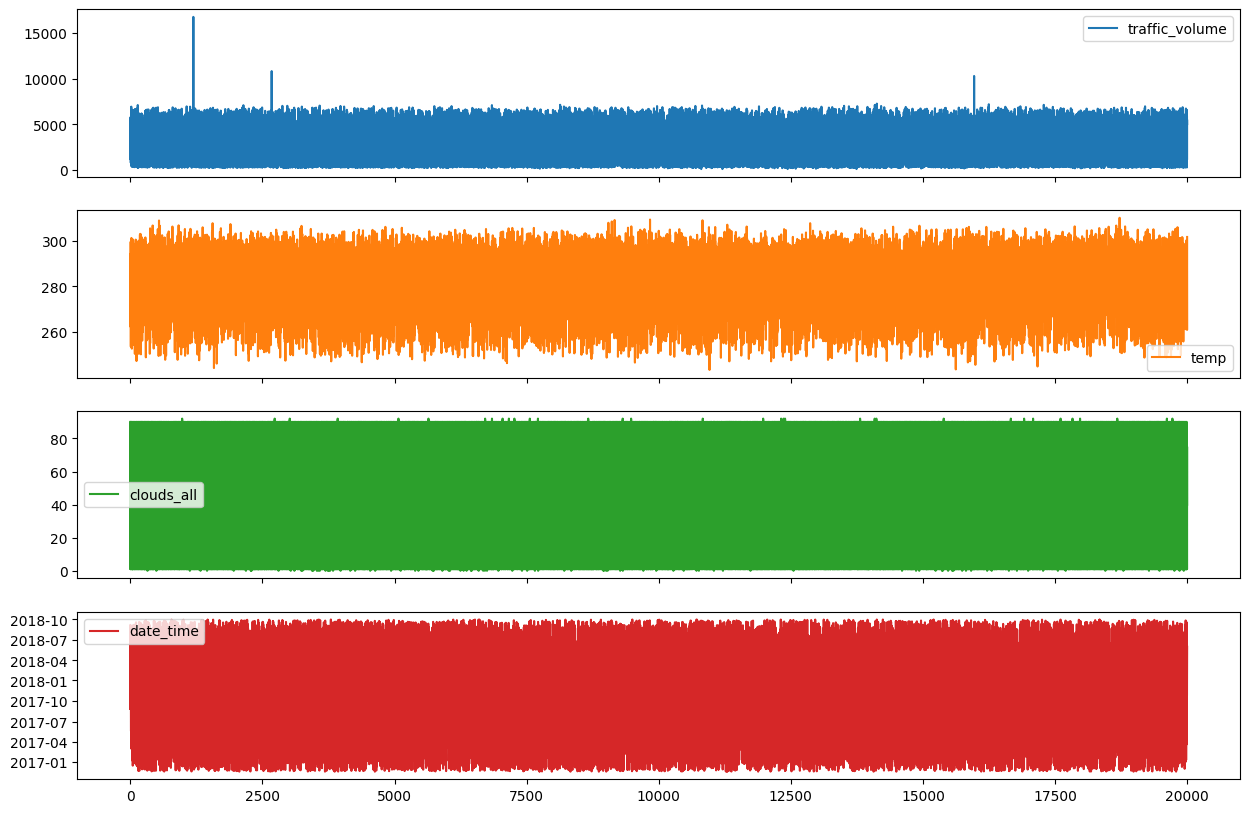

In [205]:
df.plot(subplots=True, figsize=(15, 10))
plt.show()

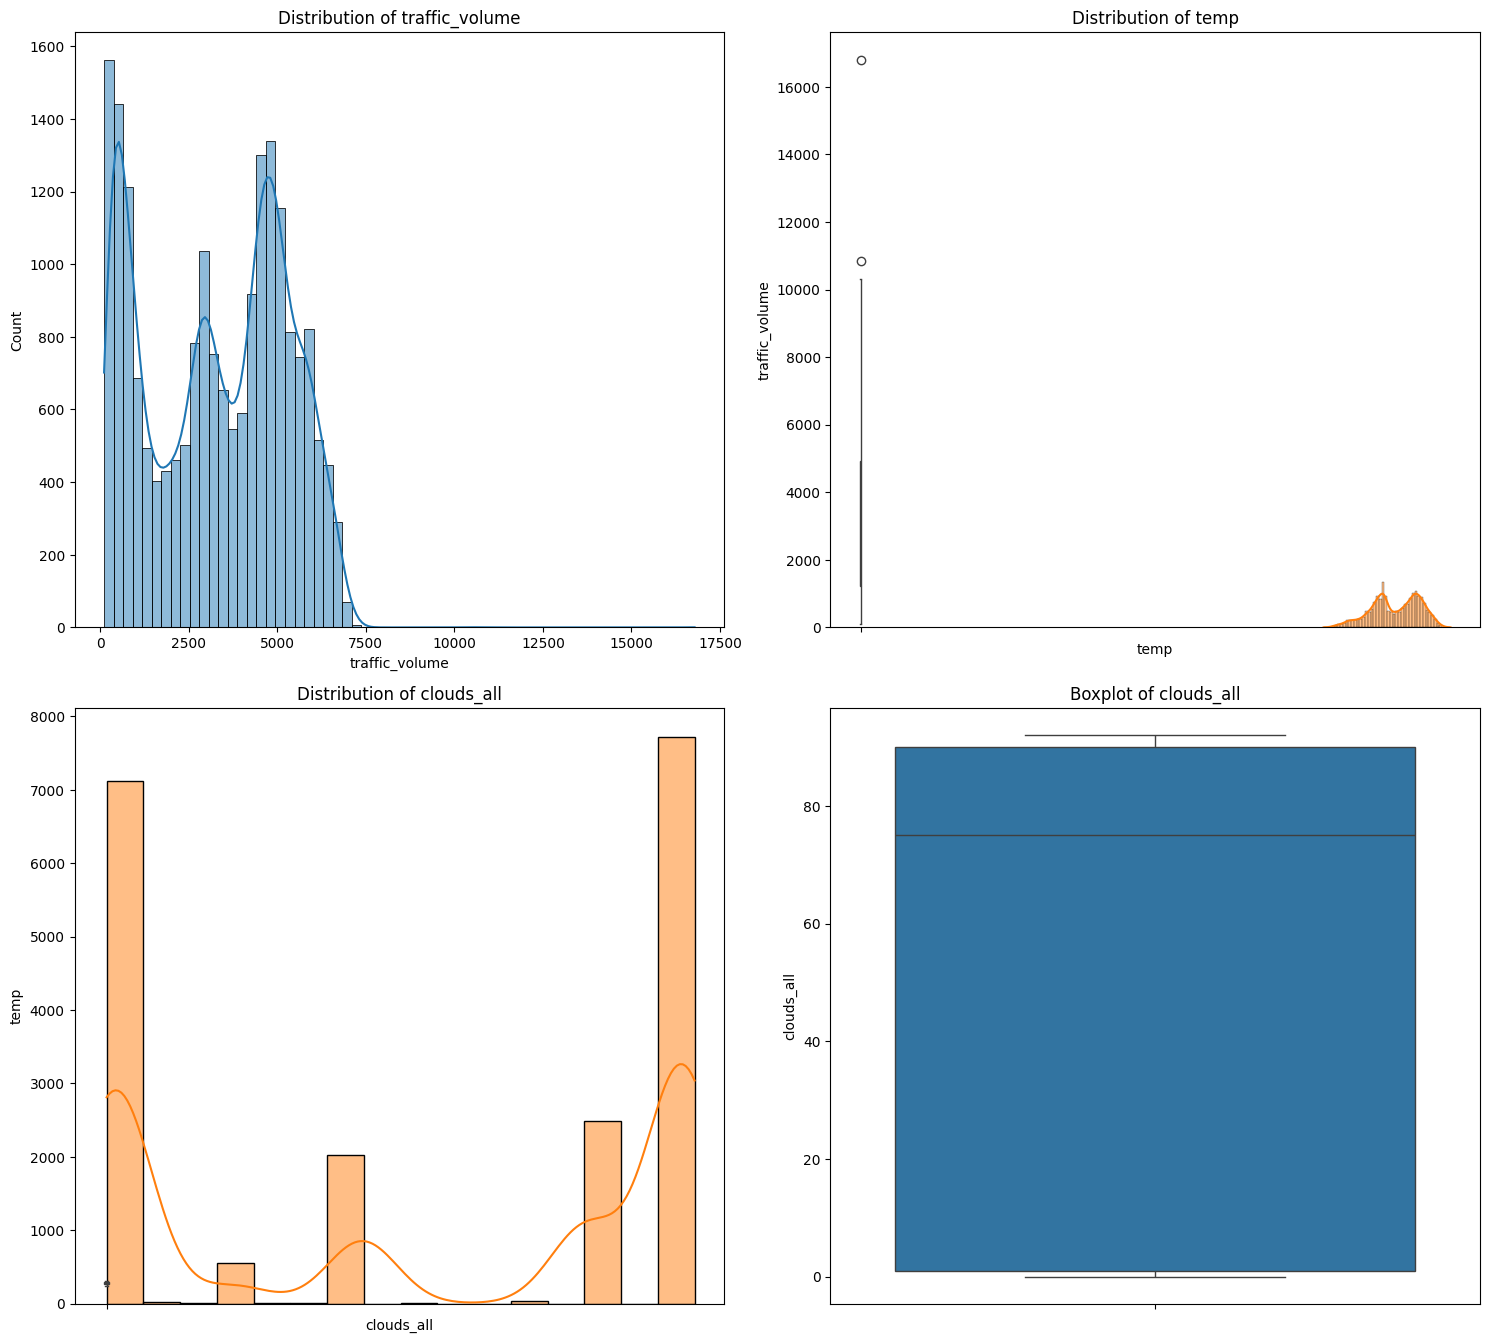

In [206]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 20))

for i, feature in enumerate(numerical_features.columns):
    plt.subplot(len(numerical_features.columns), 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.subplot(len(numerical_features.columns), 2, i + 2)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

plt.show()

<Figure size 1500x600 with 0 Axes>

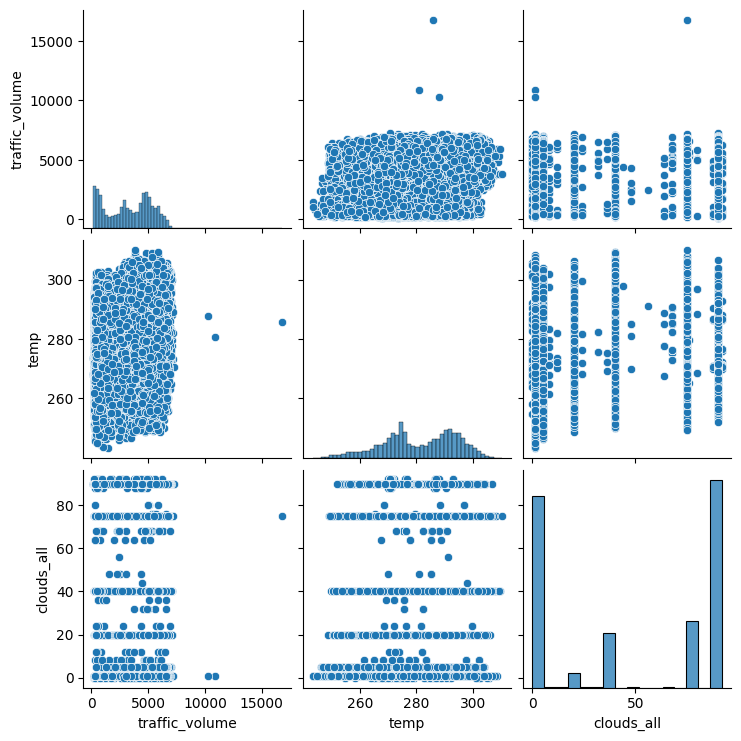

In [207]:
plt.figure(figsize=(15,6))
sns.pairplot(df)

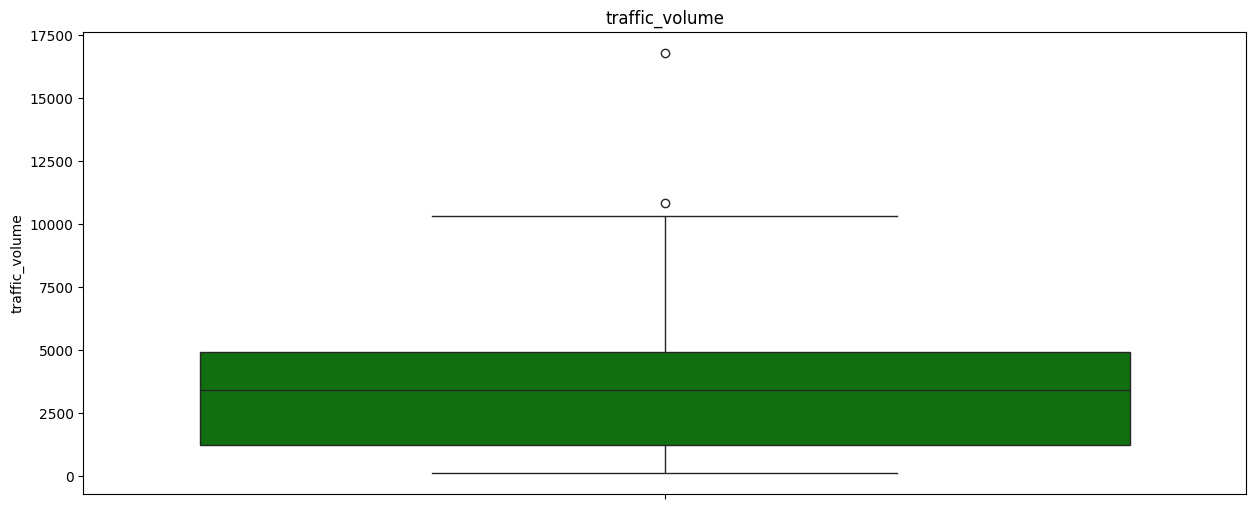

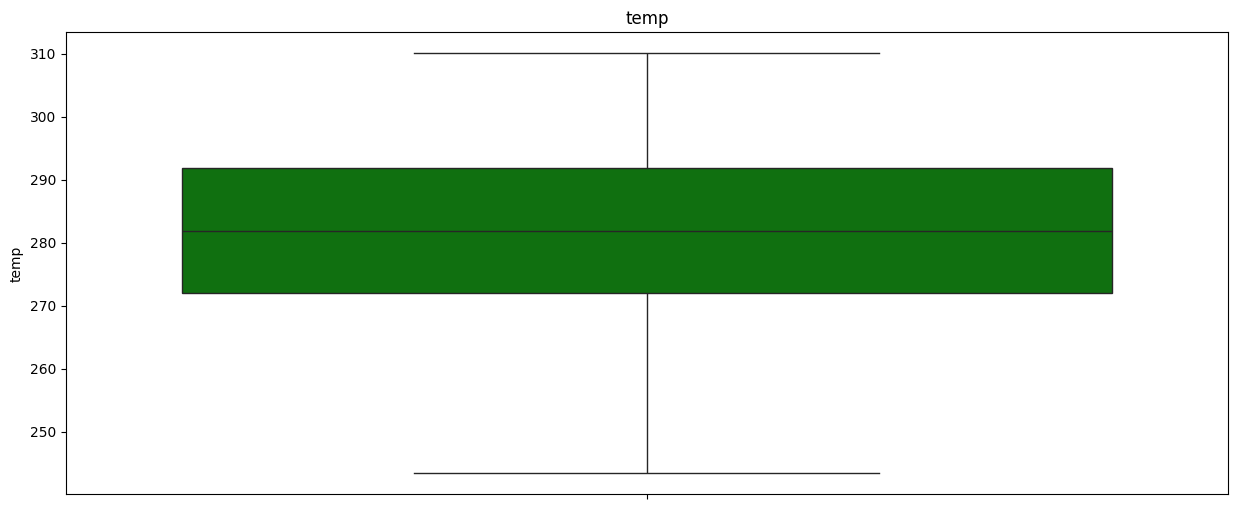

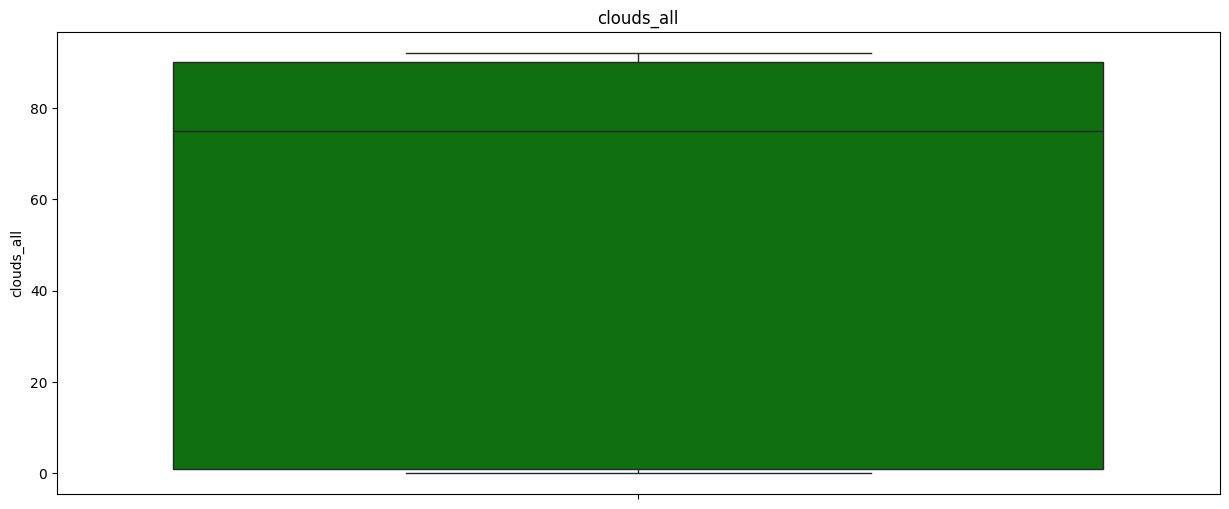

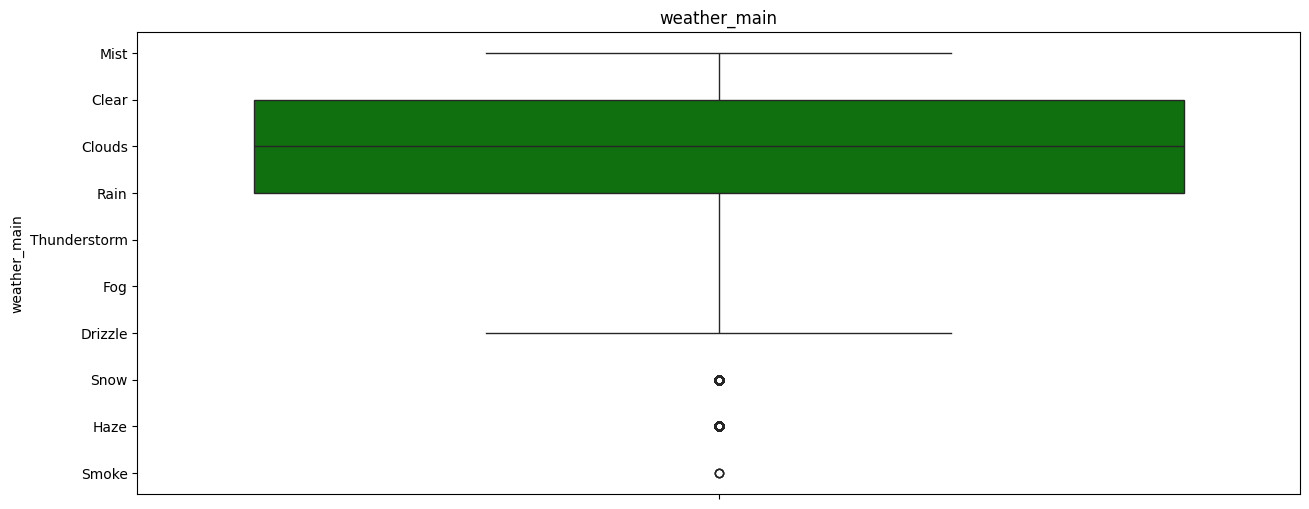

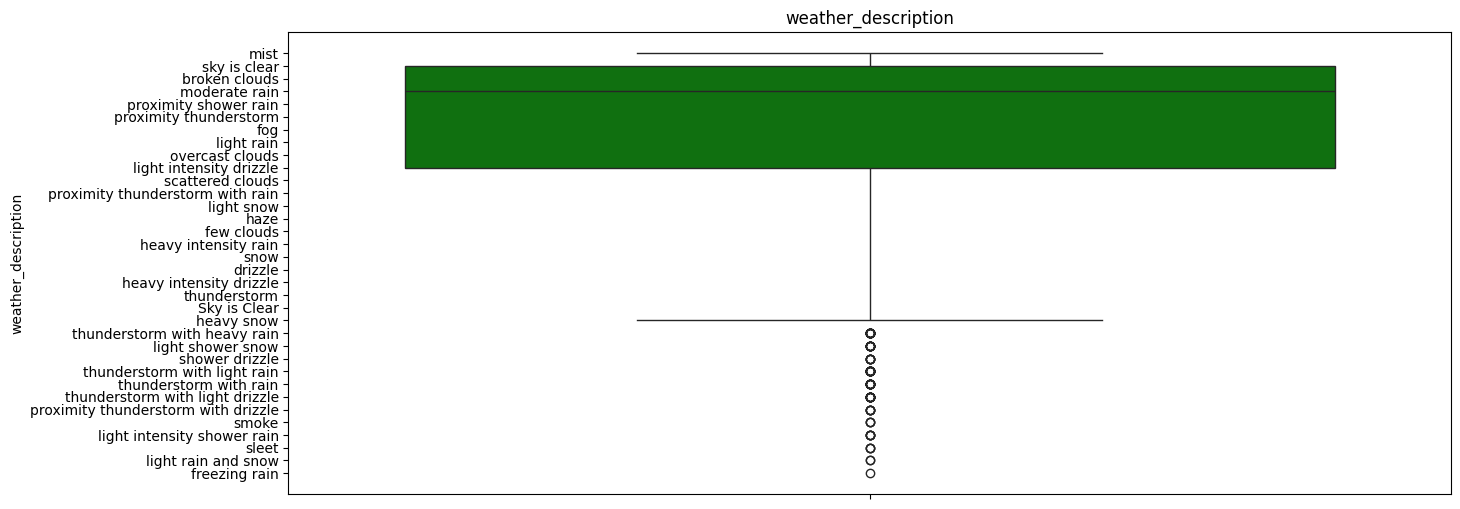

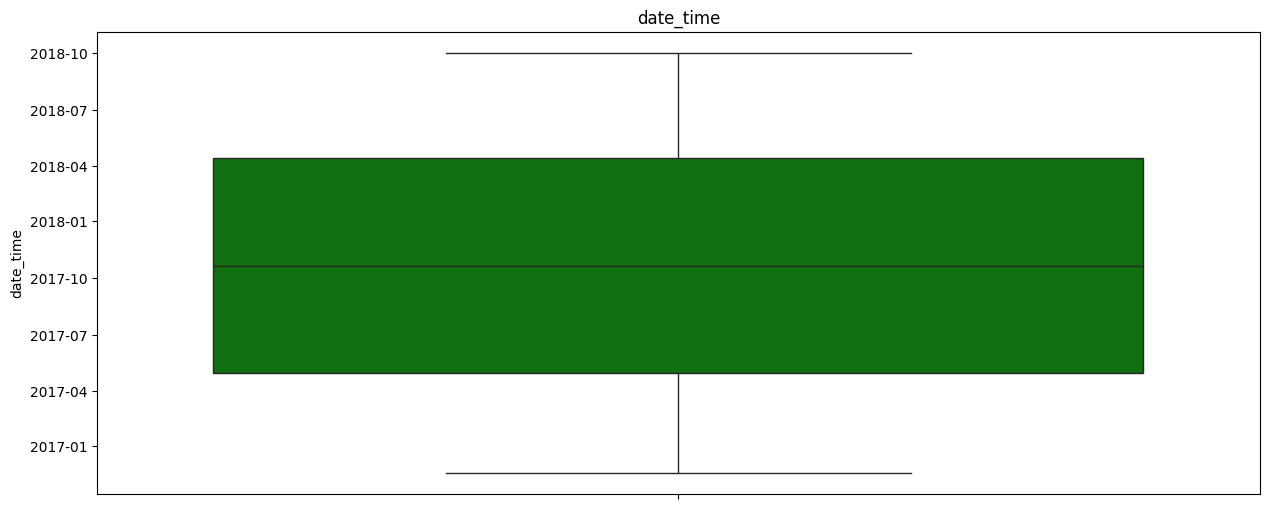

In [208]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(df[i],color='green')
    plt.title(i)
    plt.show()

<ipython-input-209-3cf37cc0a4cc>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["traffic_volume"] = df['traffic_volume'].fillna(method='ffill')


<Figure size 1200x800 with 0 Axes>

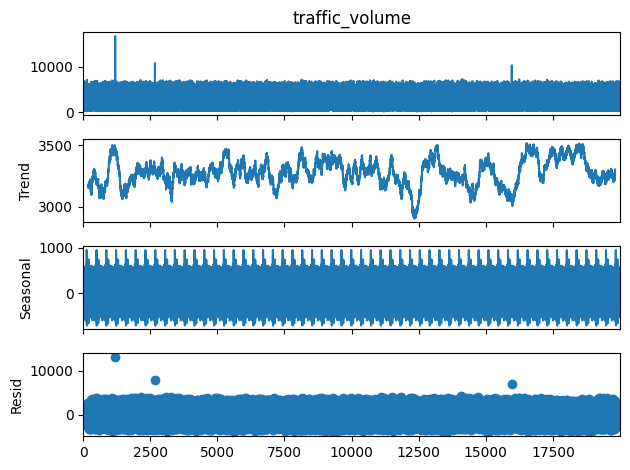

In [209]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df["traffic_volume"] = df['traffic_volume'].fillna(method='ffill')

result = seasonal_decompose(df['traffic_volume'], model='additive', period=365)

plt.figure(figsize=(12, 8))
result.plot()
plt.show()


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       20000 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   clouds_all           20000 non-null  int64         
 3   weather_main         20000 non-null  object        
 4   weather_description  20000 non-null  object        
 5   date_time            20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 937.6+ KB


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [211]:
df.duplicated().sum()

12

In [212]:
df.drop_duplicates(inplace=True)

In [213]:
df.duplicated().sum()

0

In [214]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [215]:
df.shape

(19988, 6)

<Axes: >

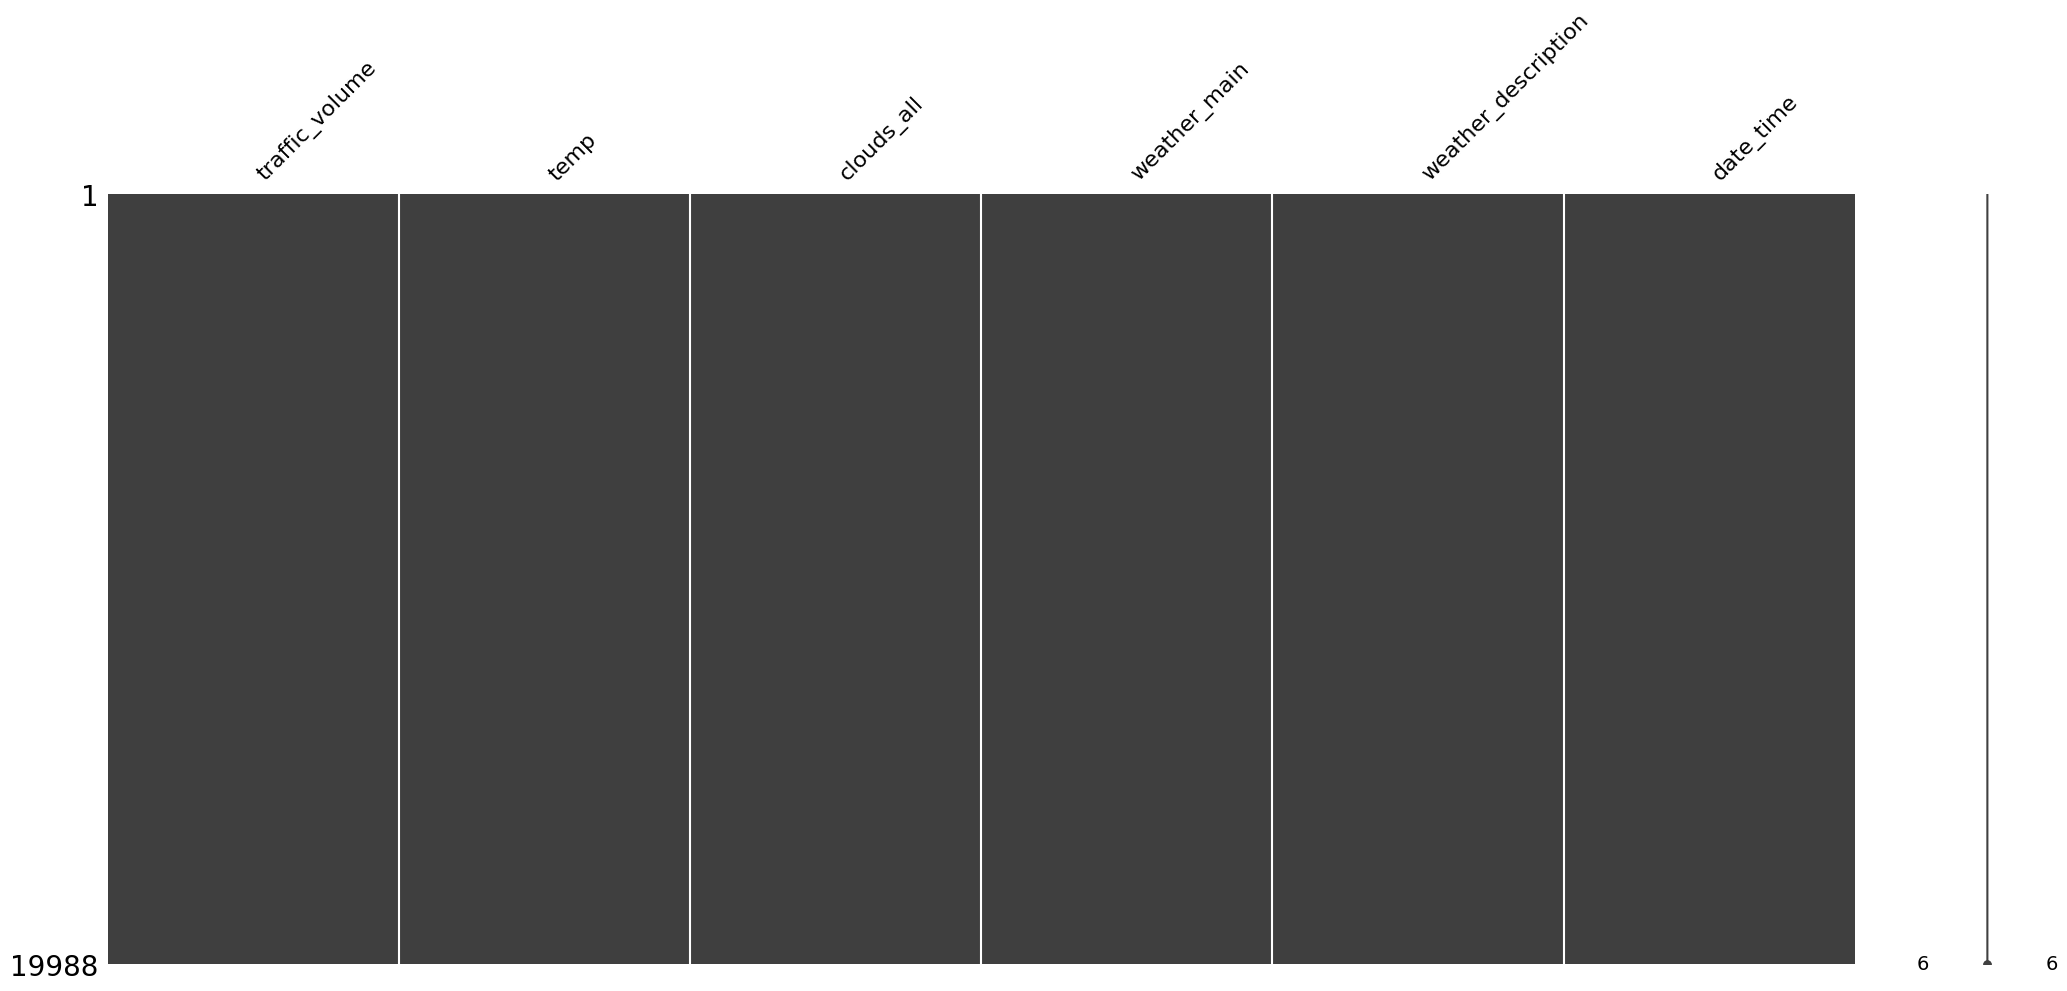

In [216]:
msno.matrix(df)

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

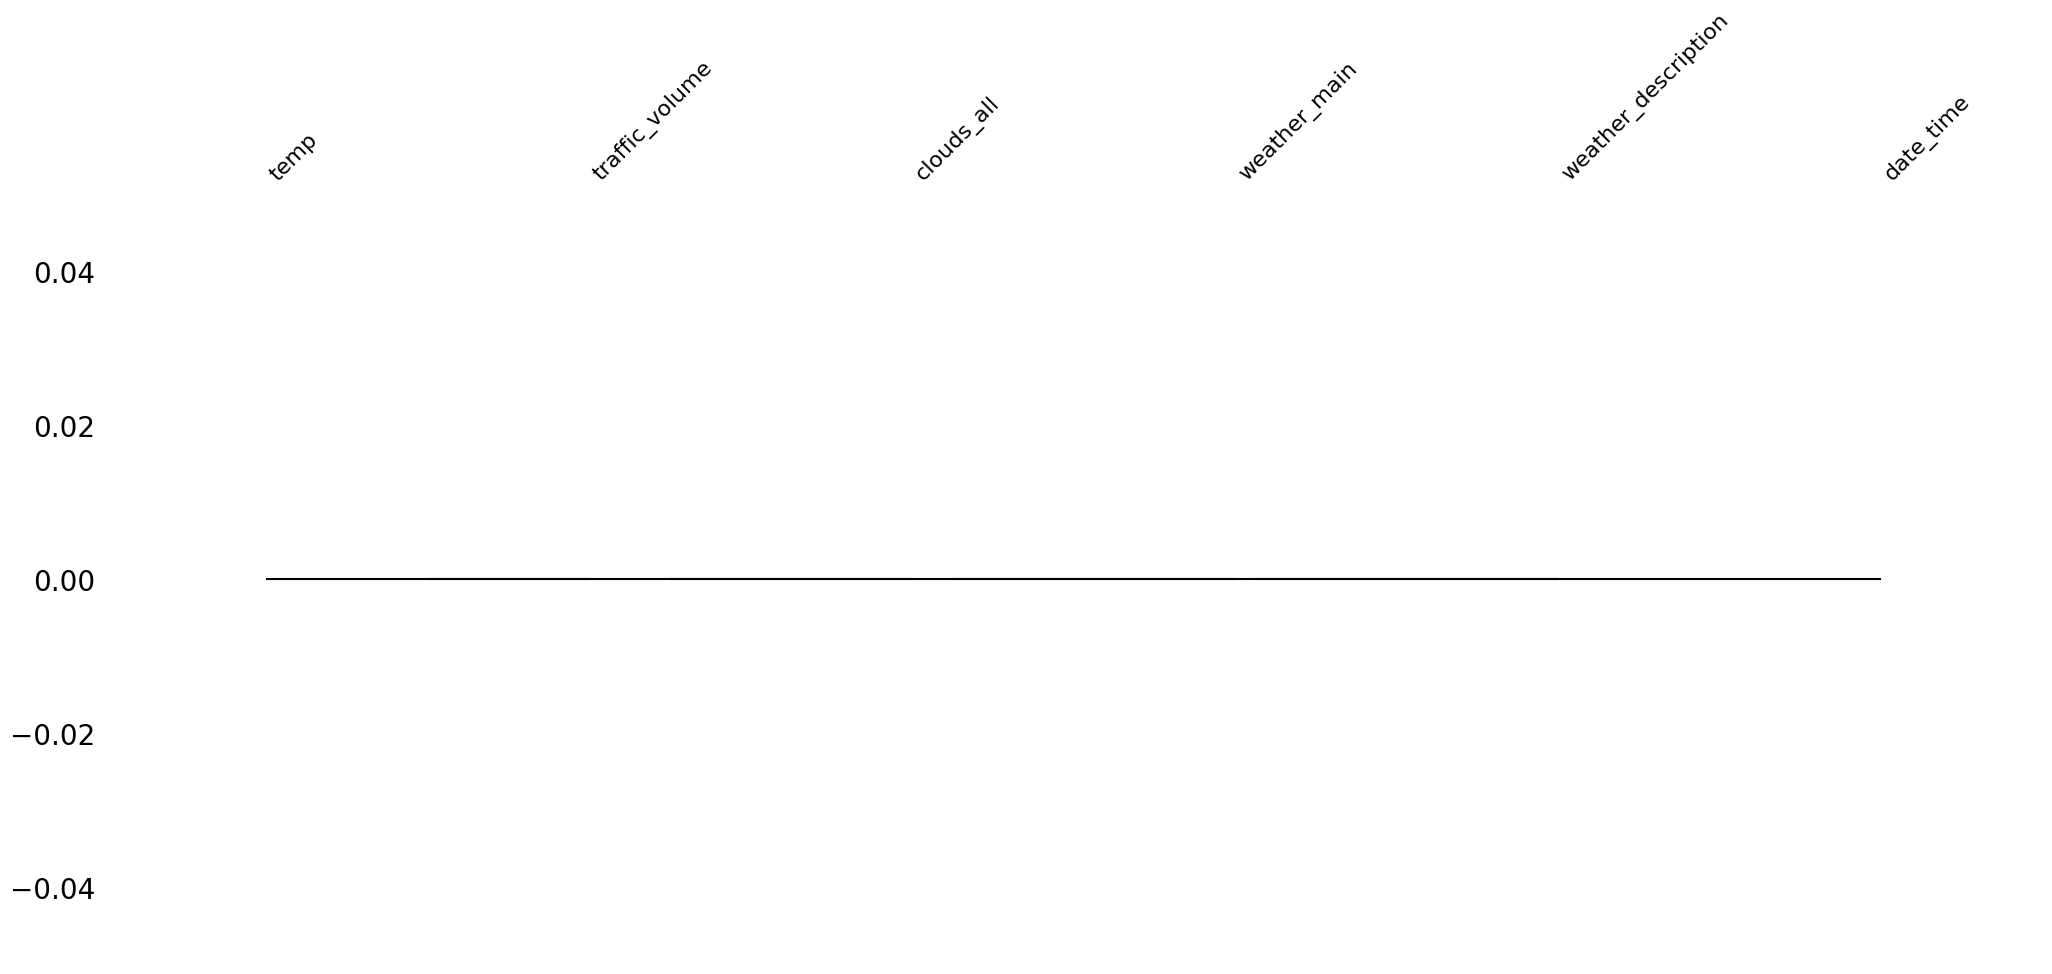

In [217]:
msno.dendrogram(df)

In [218]:
df.dropna(inplace=True)

In [219]:
df.columns

Index(['traffic_volume', 'temp', 'clouds_all', 'weather_main',
       'weather_description', 'date_time'],
      dtype='object')

In [220]:
df["traffic_volume"].unique()

array([1209., 1248., 4602., ..., 6742., 1783., 1132.])

In [221]:
df.sort_index(inplace=True)

In [222]:
df["traffic_volume"].value_counts()

,count
traffic_volume,
353.0,29
358.0,22
373.0,22
344.0,22
340.0,22
...,...
3821.0,1
3373.0,1
1300.0,1


In [223]:
df["weather_main"].value_counts()

,count
weather_main,
Clear,5609
Clouds,5231
Mist,2757
Rain,2244
Snow,1461
Drizzle,992
Haze,672
Thunderstorm,541
Fog,478


In [224]:
df.columns

Index(['traffic_volume', 'temp', 'clouds_all', 'weather_main',
       'weather_description', 'date_time'],
      dtype='object')

data is sort i ues df.sort_index(inplace=True)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [225]:
df['traffic_volume_in_week_b'] = df['traffic_volume'].shift(7)

In [226]:
df["traffic_volume_in_day_befor"]=df["traffic_volume"].shift(1)

In [227]:
df["Differenc_in_traffic_volume"]=df["traffic_volume"].diff()

In [228]:
df['traffic_volume_mean'] = df['traffic_volume'].rolling(window=30).mean()

In [229]:
df['Day_of_Week'] = df['date_time'].dt.dayofweek

In [230]:
df['Month'] = df['date_time'].dt.month

In [231]:
df['Day_of_Year'] = df['date_time'].dt.dayofyear

In [232]:
df['IsWeekend'] = df['date_time'].dt.weekday >= 5

In [233]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume_in_week_b,7
traffic_volume_in_day_befor,1
Differenc_in_traffic_volume,1
traffic_volume_mean,29


In [234]:
df['Differenc_in_traffic_volume']

,Differenc_in_traffic_volume
0,NaN
1,39.0
2,3354.0
3,-1764.0
4,2956.0
...,...
19995,-3878.0
19996,3172.0
19997,-4763.0
19998,4393.0


In [235]:
df.columns

Index(['traffic_volume', 'temp', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume_in_week_b',
       'traffic_volume_in_day_befor', 'Differenc_in_traffic_volume',
       'traffic_volume_mean', 'Day_of_Week', 'Month', 'Day_of_Year',
       'IsWeekend'],
      dtype='object')

In [236]:
df.dropna(inplace=True)

In [237]:
df["Differenc_in_traffic_volume"].value_counts()

,count
Differenc_in_traffic_volume,
0.0,22
300.0,9
223.0,9
416.0,9
-936.0,9
...,...
4832.0,1
-5082.0,1
1469.0,1


In [238]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume_in_week_b,0
traffic_volume_in_day_befor,0
Differenc_in_traffic_volume,0
traffic_volume_mean,0


It is normal for there to be missing data after extracting new columns, because it will scan the values. I will get rid of the missing values ​​again, but it is also possible for me to fill them in based on the previous values.

In [94]:
df.columns

Index(['traffic_volume', 'temp', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume_in_week_b',
       'traffic_volume_in_day_befor', 'Differenc_in_traffic_volume',
       'traffic_volume_mean', 'Day_of_Week', 'Month', 'Day_of_Year',
       'IsWeekend'],
      dtype='object')

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [304]:
split_index_train = int(len(df) * 0.7)
split_index_val = int(len(df) * 0.9)

train_df = df[:split_index_train]
val_df = df[split_index_train:split_index_val]
test_df = df[split_index_val:]


In [140]:
#train=df.loc["2016-11-18 15:00:00":"'2018-01-31T11:00:00"]
#val=df.loc["'2018-01-16T23:00:00":"'2016-11-26T11:00:00"]
#test=df.loc["'2016-11-26T11:00:00":]
#print(train.shape,val.shape,test.shape)


(0, 14) (0, 14) (19959, 14)


In [100]:
df["date_time"].min()

Timestamp('2016-11-18 15:00:00')

In [137]:
df["date_time"].max()

Timestamp('2018-09-30 23:00:00')

In [270]:
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.2)

train = df.iloc[:train_size]
val = df.iloc[train_size:train_size + val_size]
test = df.iloc[train_size + val_size:]

In [287]:
from sklearn.model_selection import train_test_split
train_val,test=train_test_split(df,test_size=0.1,shuffle=False)
train,val=train_test_split(train_val,test_size=0.9,shuffle=False)

In [288]:
train, test = train_test_split(df, test_size=0.3, shuffle=False)


val_size = 0.47
val, test = train_test_split(test, test_size=val_size, shuffle=False)


print("Train period:", train.index.min(), "to", train.index.max())
print("Validation period:", val.index.min(), "to", val.index.max())
print("Test period:", test.index.min(), "to", test.index.max())

Train period: 29 to 14003
Validation period: 14004 to 17177
Test period: 17178 to 19999


In [290]:
correlation_matrix = df.corr()

target_correlation = correlation_matrix['traffic_volume'].sort_values(ascending=False)
print(target_correlation)

traffic_volume                 1.000000
Differenc_in_traffic_volume    0.706077
traffic_volume_mean            0.185432
temp                           0.132875
clouds_all                     0.089211
Month                          0.001889
Day_of_Year                    0.001568
traffic_volume_in_day_befor    0.000067
traffic_volume_in_week_b      -0.009424
weather_main                  -0.051918
weather_description           -0.085758
Day_of_Week                   -0.140631
IsWeekend                     -0.216390
Name: traffic_volume, dtype: float64


In [ ]:
traffic_volume
Differenc_in_traffic_volume
traffic_volume_mean
weather_description           -.
Day_of_Week                   -.
IsWeekend

In [ ]:
#train=df.loc["2016-11-18 15:00:00":""]
#val=df.loc["":""]
#test=df.loc["":]
#print(train.shape,val.shape,test.shape)

In [ ]:
#df["date_time"]

In [106]:
#from sklearn.model_selection import train_test_split
#train_val,test=train_test_split(df,test_size=0.2,shuffle=False)
#train,val=train_test_split(train,test_size=0.2,shuffle=False)


In [ ]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time',
       'traffic_volume_in_week_b', 'traffic_volume_in_day_befor',
       'Differenc_in_traffic_volume', 'Day_of_Week', 'Month', 'Day_of_Year',
       'IsWeekend'],
      dtype='object')

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1sTpRZGqtOUdBbp_cAp34cS9SWklkc_6jmkvZvrHj7UU#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
df["weather_main"].value_counts()

,count
weather_main,
Clear,5603
Clouds,5230
Mist,2755
Rain,2238
Snow,1461
Drizzle,991
Haze,672
Thunderstorm,542
Fog,478


i will but this column    
    
  MinMaxScaler:'traffic_volume', 'temp','clouds_all','weather_main', 'weather_description', 'date_time',
  'traffic_volume_in_week_b', 'traffic_volume_in_day_befor',
  Differenc_in_traffic_volume', 'Day_of_Week', 'Month', 'Day_of_Year',
  'IsWeekend'


       LabelEncoder:'weather_main', 'weather_description',

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [305]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


features_to_scale = ['traffic_volume', 'temp', 'clouds_all',
                     'traffic_volume_in_week_b', 'traffic_volume_in_day_befor',
                     'Differenc_in_traffic_volume', 'Day_of_Week', 'Month',
                     'Day_of_Year']


train[features_to_scale] = scaler.fit_transform(train[features_to_scale])
val[features_to_scale] = scaler.transform(val[features_to_scale])
test[features_to_scale] = scaler.transform(test[features_to_scale])


In [130]:
#rd=OrdinalEncoder()
#OrdinalEncoder_for_data=ord.fit_transform(df)

In [248]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weather_main'] = le.fit_transform(df['weather_main'])

In [249]:
le = LabelEncoder()
df['weather_description'] = le.fit_transform(df['weather_description'])

In [261]:
for i in df.columns:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [254]:
le = LabelEncoder()
df['IsWeekend'] = le.fit_transform(df['IsWeekend'])

In [267]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
for i in df.columns:
    scaler = MinMaxScaler()
    df[i] = le.fit_transform(df[i])

In [ ]:
for i in df.columns:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19959 entries, 29 to 19999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   traffic_volume               19959 non-null  int64
 1   temp                         19959 non-null  int64
 2   clouds_all                   19959 non-null  int64
 3   weather_main                 19959 non-null  int64
 4   weather_description          19959 non-null  int64
 5   traffic_volume_in_week_b     19959 non-null  int64
 6   traffic_volume_in_day_befor  19959 non-null  int64
 7   Differenc_in_traffic_volume  19959 non-null  int64
 8   traffic_volume_mean          19959 non-null  int64
 9   Day_of_Week                  19959 non-null  int64
 10  Month                        19959 non-null  int64
 11  Day_of_Year                  19959 non-null  int64
 12  IsWeekend                    19959 non-null  int64
dtypes: int64(13)
memory usage: 2.1 MB


In [251]:
df = df.drop('date_time', axis=1)

In [ ]:
df = df.drop('date_time', axis=1)

In [292]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import make_column_transformer

preprocessing_pipeline=make_column_transformer(
    (MinMaxScaler(),['traffic_volume', 'temp'
       'traffic_volume_in_week_b', 'traffic_volume_in_day_befor',
       'Differenc_in_traffic_volume', 'Day_of_Week', 'Month', 'Day_of_Year',
       'IsWeekend','weather_description',"weather_main"])
)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19959 entries, 29 to 19999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   traffic_volume               19959 non-null  float64
 1   temp                         19959 non-null  float64
 2   clouds_all                   19959 non-null  int64  
 3   weather_main                 19959 non-null  int64  
 4   weather_description          19959 non-null  int64  
 5   traffic_volume_in_week_b     19959 non-null  float64
 6   traffic_volume_in_day_befor  19959 non-null  float64
 7   Differenc_in_traffic_volume  19959 non-null  float64
 8   traffic_volume_mean          19959 non-null  float64
 9   Day_of_Week                  19959 non-null  int32  
 10  Month                        19959 non-null  int32  
 11  Day_of_Year                  19959 non-null  int32  
 12  IsWeekend                    19959 non-null  bool   
dtypes: bool(1), float64(

In [269]:
df.Day_of_Week

,Day_of_Week
29,3
30,3
31,3
32,6
33,5
...,...
19995,2
19996,2
19997,2
19998,0


In [153]:
df.columns

Index(['traffic_volume', 'temp', 'clouds_all', 'weather_main',
       'weather_description', 'traffic_volume_in_week_b',
       'traffic_volume_in_day_befor', 'Differenc_in_traffic_volume',
       'traffic_volume_mean', 'Day_of_Week', 'Month', 'Day_of_Year',
       'IsWeekend'],
      dtype='object')

In [268]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9980 entries, 29 to 10011
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   traffic_volume               9980 non-null   float64       
 1   temp                         9980 non-null   float64       
 2   clouds_all                   9980 non-null   int64         
 3   weather_main                 9980 non-null   int64         
 4   weather_description          9980 non-null   int64         
 5   date_time                    9980 non-null   datetime64[ns]
 6   traffic_volume_in_week_b     9980 non-null   float64       
 7   traffic_volume_in_day_befor  9980 non-null   float64       
 8   Differenc_in_traffic_volume  9980 non-null   float64       
 9   traffic_volume_mean          9980 non-null   float64       
 10  Day_of_Week                  9980 non-null   int32         
 11  Month                        9980 non-null   i

In [158]:
from sklearn.pipeline import make_pipeline

In [295]:
print("Columns in 'train':", train.columns)
print("Columns in 'val':", val.columns)
print("Columns in 'test':", test.columns)

Columns in 'train': Index(['traffic_volume', 'temp', 'clouds_all', 'weather_main',
       'weather_description', 'traffic_volume_in_week_b',
       'traffic_volume_in_day_befor', 'Differenc_in_traffic_volume',
       'traffic_volume_mean', 'Day_of_Week', 'Month', 'Day_of_Year',
       'IsWeekend'],
      dtype='object')
Columns in 'val': Index(['traffic_volume', 'temp', 'clouds_all', 'weather_main',
       'weather_description', 'traffic_volume_in_week_b',
       'traffic_volume_in_day_befor', 'Differenc_in_traffic_volume',
       'traffic_volume_mean', 'Day_of_Week', 'Month', 'Day_of_Year',
       'IsWeekend'],
      dtype='object')
Columns in 'test': Index(['traffic_volume', 'temp', 'clouds_all', 'weather_main',
       'weather_description', 'traffic_volume_in_week_b',
       'traffic_volume_in_day_befor', 'Differenc_in_traffic_volume',
       'traffic_volume_mean', 'Day_of_Week', 'Month', 'Day_of_Year',
       'IsWeekend'],
      dtype='object')


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19959 entries, 29 to 19999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   traffic_volume               19959 non-null  int64
 1   temp                         19959 non-null  int64
 2   clouds_all                   19959 non-null  int64
 3   weather_main                 19959 non-null  int64
 4   weather_description          19959 non-null  int64
 5   traffic_volume_in_week_b     19959 non-null  int64
 6   traffic_volume_in_day_befor  19959 non-null  int64
 7   Differenc_in_traffic_volume  19959 non-null  int64
 8   traffic_volume_mean          19959 non-null  int64
 9   Day_of_Week                  19959 non-null  int64
 10  Month                        19959 non-null  int64
 11  Day_of_Year                  19959 non-null  int64
 12  IsWeekend                    19959 non-null  int64
dtypes: int64(13)
memory usage: 2.1 MB


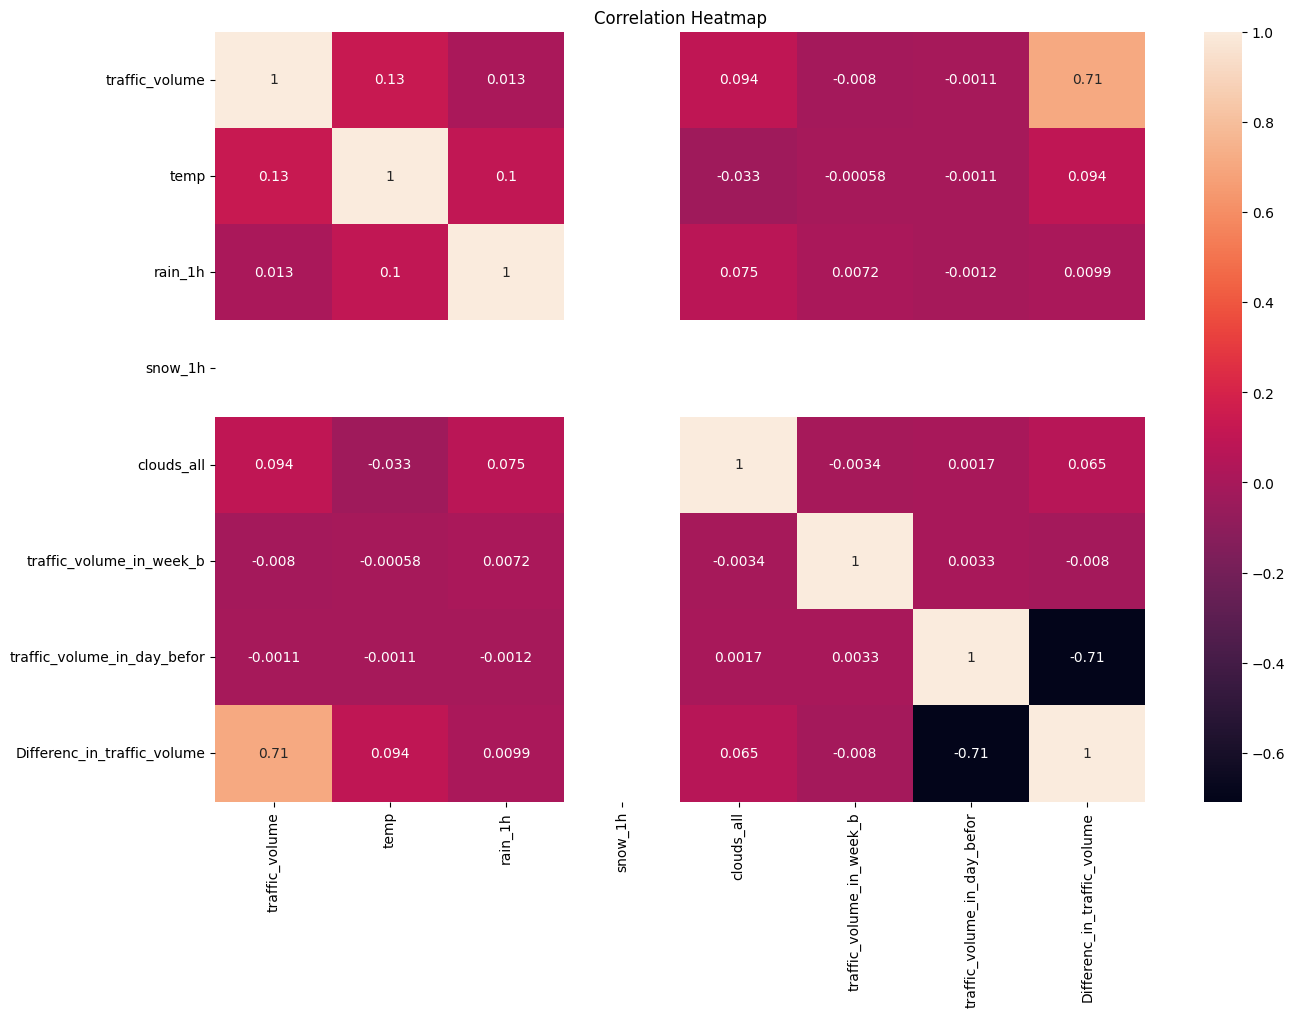

In [ ]:
df_column=df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(15,10))
sns.heatmap(df_column.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [165]:
from tensorflow.keras.utils import timeseries_dataset_from_array

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [311]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [332]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(train_df.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
history=model_lstm.fit(train_df, train_df, epochs=5, batch_size=32, validation_data=(val_df, val_df))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


437/437 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 8627098.0000 - val_loss: 7889217.0000
Epoch 2/5
437/437 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 7684076.0000 - val_loss: 7831526.0000
Epoch 3/5
437/437 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 7595960.0000 - val_loss: 7814615.0000
Epoch 4/5
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 7596407.5000 - val_loss: 7817633.0000
Epoch 5/5
437/437 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 7599039.5000 - val_loss: 7816862.5000


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [333]:
y_pred_lstm = model_lstm.predict(test_df)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [334]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [335]:
history.history

{'loss': [7972923.5, 7644755.5, 7598130.0, 7594221.5, 7599470.0],
 'val_loss': [7889217.0, 7831526.0, 7814615.0, 7817633.0, 7816862.5]}

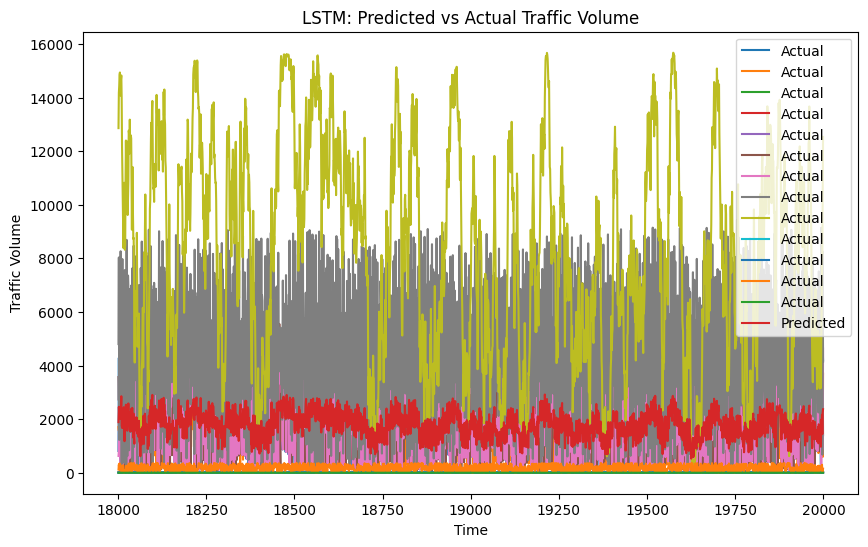

In [329]:
plt.figure(figsize=(10, 6))
plt.plot(test_df.index, test_df.values, label='Actual')
plt.plot(test_df.index, y_pred_lstm, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('LSTM: Predicted vs Actual Traffic Volume')
plt.legend()
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [349]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU ,SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential([
    SimpleRNN(50, activation='tanh', return_sequences=True),
    SimpleRNN(30, activation='tanh'),
    Dense(1, activation='relu')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [362]:
model.fit(train_df, train_df, epochs=5, batch_size=32, validation_data=(val_df, val_df))

Epoch 1/5


ValueError: Input 0 of layer "simple_rnn_6" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 13)

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
history.history

In [ ]:
y_pred_RNN = model_gru.predict(X_test)

In [367]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,Bidirectional, GaussianNoise ,GRU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
model=Sequential([
        GRU(50,activation="relu",return_sequences=True),
        GRU(30,activation="relu",return_sequences=True),
        Dense(1,activation="relu")

])


In [368]:
timesteps = 1
train_df_reshaped = np.array(train_df).reshape(train_df.shape[0], timesteps, train_df.shape[1])
val_df_reshaped = np.array(val_df).reshape(val_df.shape[0], timesteps, val_df.shape[1])

ValueError: You must call `compile()` before using the model.

In [369]:

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.compile(loss="mse",optimizer="adam",metrics=["mae"])

history=model.fit(train_df,validation_data=val_df,epochs=100,batch_size=128,callbacks=early_stopping)

Epoch 1/100


ValueError: Input 0 of layer "gru_4" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 13)

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_df.index, test_df.values, label='Actual')
plt.plot(test_df.index, y_pred_gru, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('LSTM: Predicted vs Actual Traffic Volume')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?

2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model. New columns have been created
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?

4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

There are many improvements that can be made to this code, but within time

 loss='mse' it is the best for time

This data is excellent after analyzing the time to determine many of the characteristics that can be taken from it.

This data set had some missing data that was resolved by deleting it

ctivation='tanh' in the first leary

activation='relu') in the last layer

New columns have been created to help in the analysis of day and date

In [360]:
from tensorflow.keras.layers import GRU

model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(n_steps, n_features)))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_gru.fit(train_df, epochs=50, validation_data=val_df)

In [ ]:
y_pred_gru = scaler.inverse_transform(y_pred_gru.reshape(-1, 1))

### Answer Here: